In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# New starting stats for data5 (copied from data5 and only adding back in PIE)

Steps:
  - Decide on new starting stats
  - Save `data5_clean.csv`
  - transform data
    - write out `data5_tr.csv`
  - PCA
    - write out `pca4_99.csv`



In [3]:
df_master = pd.read_csv('../data/master_1996_2019.csv', index_col=0)
df_master.shape
df_master.head()

(11149, 86)

,%3PA,%3PM,%AST,%BLK,%BLKA,%DREB,%FGA,%FGA 2PT,%FGA 3PT,%FGM,...,REB%,STL,TD3,TEAM,TO RATIO,TOT MIN,TOV,TS%,USG%,W
A.C. Green 96,2.6,0.4,6.8,8.4,15.5,29.9,11.8,95.9,4.1,13.3,...,13.5,1.5,0,DAL,10.3,2494.0,1.6,52.3,11.8,23
Aaron McKie 96,16.6,19.6,25.2,12.4,22.6,17.7,14.4,71.8,28.2,13.2,...,7.1,2.5,0,DET,13.5,1624.0,2.9,52.4,14.2,48
Aaron Williams 96,0.5,0.0,6.3,40.8,11.9,24.3,16.6,99.3,0.7,22.4,...,12.9,1.5,0,VAN,15.0,562.0,3.0,59.9,16.1,4
Acie Earl 96,2.9,0.0,11.1,49.1,14.5,20.5,22.3,97.2,2.8,20.5,...,9.4,1.5,0,MIL,12.7,500.0,3.5,43.5,22.0,14
Adam Keefe 96,0.5,0.0,6.7,16.9,16.5,24.4,11.3,99.4,0.6,11.6,...,12.9,1.7,0,UTA,15.9,917.0,2.5,57.2,12.4,48


### Determing data5 initial starting stats with exploration

In [9]:
df_master[['DREB', 'OREB', 'REB', 'DREB%', 'OREB%', 'REB%']].head()

,DREB,OREB,REB,DREB%,OREB%,REB%
A.C. Green 96,9.2,4.7,14.0,18.4,8.9,13.5
Aaron McKie 96,5.9,1.3,7.2,11.3,2.6,7.1
Aaron Williams 96,7.6,5.8,13.5,14.4,11.3,12.9
Acie Earl 96,6.2,3.5,9.7,12.2,6.7,9.4
Adam Keefe 96,8.0,4.2,12.2,15.8,9.6,12.9


In [12]:
df_master[['FTA', 'FTM', 'FT%']].head()

,FTA,FTM,FT%
A.C. Green 96,4.2,2.7,65.0
Aaron McKie 96,3.6,3.0,83.6
Aaron Williams 96,4.6,3.1,67.3
Acie Earl 96,8.5,5.5,64.3
Adam Keefe 96,5.8,4.0,68.9


In [16]:
df_master[df_master['TOT MIN']>800]['%PTS FBPS'].sort_values(ascending=False)[0:20]

Corey Brewer 13       43.0
Tony Allen 10         40.3
Kerry Kittles 02      38.0
Corey Brewer 11       37.7
Tony Allen 11         36.6
Corey Brewer 14       36.1
Eddie Robinson 99     35.2
Milt Palacio 03       35.0
John Wall 11          34.9
Kerry Kittles 01      34.6
John Wall 10          34.5
Tony Allen 04         34.1
Corey Brewer 15       33.9
Kerry Kittles 03      33.8
Antonio Daniels 99    33.6
Jerome Williams 01    33.4
Darren Collison 12    33.3
Eddie Robinson 02     33.0
P.J. Tucker 12        33.0
Garrett Temple 15     32.8
Name: %PTS FBPS, dtype: float64

In [23]:
df_master[df_master['TOT MIN']>800]['%3PA'].sort_values(ascending=False)[0:20]

Dee Brown 98            70.4
Sam Mack 97             69.7
Wesley Person 97        65.6
Chris Whitney 01        64.6
Darrell Armstrong 99    64.3
Anthony Peeler 98       63.3
Allen Iverson 98        63.2
JR Smith 06             62.9
John Starks 98          62.1
Wesley Person 98        62.1
Joe Dumars 97           62.0
Jaren Jackson 98        61.8
Greg Anthony 00         61.4
Chuck Person 97         61.2
Joe Dumars 98           60.7
Ray Allen 97            60.6
Mitch Richmond 97       60.6
Jaren Jackson 99        60.6
Tim Thomas 06           60.2
Reggie Miller 96        59.7
Name: %3PA, dtype: float64

In [19]:
df_master[df_master['TOT MIN']>800]['%DREB'].sort_values(ascending=False)[0:20]

Reggie Evans 12        50.9
Andre Drummond 19      48.6
Marcus Camby 10        48.5
DeAndre Jordan 17      48.5
Andre Drummond 17      46.6
Andre Drummond 16      46.6
Ben Wallace 02         46.1
Dennis Rodman 96       45.3
Danny Fortson 99       45.1
Hassan Whiteside 16    45.1
Kevin Love 10          45.0
Hassan Whiteside 17    44.8
Andre Drummond 18      44.7
Marcus Camby 11        44.6
Danny Fortson 98       44.5
DeAndre Jordan 18      44.4
Dennis Rodman 97       44.4
Hassan Whiteside 18    44.1
Hassan Whiteside 14    44.1
Troy Murphy 08         44.1
Name: %DREB, dtype: float64

In [5]:
## the original unique starting cols pulled raw from the 6 stat tables scraped

start_cols = ['%3PA',
            '%3PM',
            '%AST',
            '%BLK',
            '%BLKA',
            '%DREB',
            '%FGA',
            '%FGA 2PT',
            '%FGA 3PT',
            '%FGM',
            '%FTA',
            '%FTM',
            '%OREB',
            '%PF',
            '%PFD',
            '%PTS',
            '%PTS 2PT',
            '%PTS 2PT MR',
            '%PTS 3PT',
            '%PTS FBPS',
            '%PTS FT',
            '%PTS OFFTO',
            '%PTS PITP',
            '%REB',
            '%STL',
            '%TOV',
            '+/-',
            '2FGM %AST',
            '2FGM %UAST',
            '2ND PTS',
            '3FGM %AST',
            '3FGM %UAST',
            '3P%',
            '3PA',
            '3PM',
            'AGE',
            'AST',
            'AST RATIO',
            'AST%',
            'AST/TO',
            'BLK',
            'BLKA',
            'DD2',
            'DEF WS',
            'DEFRTG',
            'DREB',
            'DREB%',
            'EFG%',
            'FBPS',
            'FG%',
            'FGA',
            'FGM',
            'FGM %AST',
            'FGM %UAST',
            'FP',
            'FT%',
            'FTA',
            'FTM',
            'GP',
            'L',
            'NETRTG',
            'OFFRTG',
            'OPP 2ND PTS',
            'OPP FBPS',
            'OPP PITP',
            'OPP PTS OFF TO',
            'OREB',
            'OREB%',
            'PACE',
            'PF',
            'PFD',
            'PIE',
            'PITP',
            'PTS',
            'PTS OFF TO',
            'REB',
            'REB%',
            'STL',
            'TD3',
            'TEAM',
            'TO RATIO',
            'TOT MIN',
            'TOV',
            'TS%',
            'USG%',
            'W']

len(start_cols)

86

In [27]:
df_master[df_master['TOT MIN']>800]['%PTS'].sort_values(ascending=False)[0:20]

James Harden 18             41.3
Kobe Bryant 05              40.5
Russell Westbrook 16        39.5
James Harden 19             38.5
Giannis Antetokounmpo 19    38.3
Tracy McGrady 02            38.0
Dwyane Wade 08              37.1
Allen Iverson 00            36.9
Jerry Stackhouse 00         36.9
Allen Iverson 01            36.7
Kevin Durant 13             36.7
Carmelo Anthony 12          36.5
Michael Jordan 97           36.3
DeMarcus Cousins 16         36.2
Allen Iverson 05            36.2
Isaiah Thomas 16            36.2
James Harden 17             36.1
Jermaine O'Neal 04          36.1
Michael Jordan 96           36.0
LeBron James 07             36.0
Name: %PTS, dtype: float64

In [28]:
df_master[df_master['TOT MIN']>800]['PTS'].sort_values(ascending=False)[0:20]

James Harden 18             48.2
Kobe Bryant 05              44.5
James Harden 19             43.9
Russell Westbrook 16        43.7
Giannis Antetokounmpo 19    43.2
James Harden 17             41.9
Isaiah Thomas 16            41.7
Stephen Curry 15            41.1
Tracy McGrady 02            41.0
Michael Jordan 96           41.0
Kevin Durant 13             40.9
Carmelo Anthony 12          40.9
Luka Doncic 19              40.6
Dwyane Wade 08              40.4
LeBron James 08             39.9
Kawhi Leonard 19            39.8
Shaquille O'Neal 97         39.8
Russell Westbrook 14        39.5
LeBron James 09             39.4
DeMarcus Cousins 16         39.3
Name: PTS, dtype: float64

In [32]:
df_master[df_master['TOT MIN']>800]['%AST'].sort_values(ascending=False)[0:20]
print()
df_master[df_master['TOT MIN']>800]['AST'].sort_values(ascending=False)[0:20]

Chris Paul 08           67.5
Russell Westbrook 16    65.9
Steve Nash 09           65.7
Chris Paul 07           65.4
Steve Nash 10           63.6
Steve Nash 11           63.0
Rajon Rondo 13          62.8
Brevin Knight 04        62.6
Chris Paul 09           62.3
Rajon Rondo 15          61.9
Steve Nash 04           61.6
Mark Jackson 96         60.7
Chris Paul 06           60.7
Russell Westbrook 17    60.4
Rajon Rondo 11          60.2
Rajon Rondo 12          60.2
Sergio Rodriguez 06     60.1
Andre Miller 01         59.7
Mark Jackson 98         59.6
Russell Westbrook 15    59.6
Name: %AST, dtype: float64

Steve Nash 10       17.0
Steve Nash 11       17.0
Steve Nash 04       16.5
Rajon Rondo 11      16.4
Steve Nash 09       16.4
Steve Nash 06       16.2
Chris Paul 07       16.0
John Stockton 96    15.8
Mark Jackson 96     15.8
Steve Nash 07       15.7
Rajon Rondo 15      15.6
Rajon Rondo 10      15.6
Mark Jackson 97     15.6
John Stockton 97    15.4
John Stockton 00    15.4
Brevin Knight 04    15.4
Chris Paul 08       15.4
Andre Miller 01     15.3
Mark Jackson 98     15.1
Chris Paul 12       15.1
Name: AST, dtype: float64

In [38]:
df_master[df_master['TOT MIN']>800]['FBPS'].sort_values(ascending=False)[0:20]
print()
df_master[df_master['TOT MIN']>800]['%PTS FBPS'].sort_values(ascending=False)[0:20]

Russell Westbrook 14        11.5
Russell Westbrook 13         9.7
Russell Westbrook 16         9.2
Tony Allen 10                8.9
Stephen Curry 14             8.9
James Harden 13              8.9
Giannis Antetokounmpo 19     8.8
Russell Westbrook 15         8.8
Stephen Curry 15             8.7
Allen Iverson 98             8.6
Allen Iverson 00             8.5
Kerry Kittles 02             8.4
Stephen Curry 16             8.4
John Wall 12                 8.4
LeBron James 13              8.3
Grant Hill 04                8.2
Russell Westbrook 12         8.1
James Harden 12              8.1
Monta Ellis 07               8.1
Kevin Durant 16              8.0
Name: FBPS, dtype: float64

Corey Brewer 13       43.0
Tony Allen 10         40.3
Kerry Kittles 02      38.0
Corey Brewer 11       37.7
Tony Allen 11         36.6
Corey Brewer 14       36.1
Eddie Robinson 99     35.2
Milt Palacio 03       35.0
John Wall 11          34.9
Kerry Kittles 01      34.6
John Wall 10          34.5
Tony Allen 04         34.1
Corey Brewer 15       33.9
Kerry Kittles 03      33.8
Antonio Daniels 99    33.6
Jerome Williams 01    33.4
Darren Collison 12    33.3
Eddie Robinson 02     33.0
P.J. Tucker 12        33.0
Garrett Temple 15     32.8
Name: %PTS FBPS, dtype: float64

In [39]:
df_master[df_master['TOT MIN']>800]['%PTS FT'].sort_values(ascending=False)[0:20]

Danny Fortson 04       49.0
Tony Farmer 99         43.7
Donald Royal 96        43.1
Kevin Ollie 03         43.1
Corey Maggette 06      41.0
Dikembe Mutombo 05     40.8
Kevin Ollie 01         40.5
Tyler Hansbrough 13    40.4
Reggie Evans 08        39.7
Kevin Ollie 08         39.6
Jason Collins 02       39.1
Jarron Collins 03      39.0
Jarron Collins 04      39.0
Zaza Pachulia 10       38.7
Corey Maggette 04      38.5
Reggie Evans 03        38.2
Tyler Hansbrough 12    38.0
Jimmy Butler 19        37.9
Jarron Collins 05      37.8
Reggie Evans 02        37.7
Name: %PTS FT, dtype: float64

In [41]:
df_master[['FGA', 'FGM', 'FG%']]

,FGA,FGM,FG%
A.C. Green 96,10.3,5.0,48.3
Aaron McKie 96,11.8,4.9,41.1
Aaron Williams 96,13.9,8.0,57.4
Acie Earl 96,18.1,6.8,37.4
Adam Keefe 96,9.1,4.6,51.3
...,...,...,...
Zach LaVine 19,27.4,12.3,45.0
Zach Norvell Jr. 19,13.0,3.3,25.0
Zhaire Smith 19,15.3,4.2,27.3
Zion Williamson 19,24.3,14.2,58.3


In [9]:
df_master[df_master['TOT MIN']>700]['%REB'].sample(15)

Cody Martin 19          19.9
LaMarcus Aldridge 14    30.5
Lee Nailon 01           16.9
Justise Winslow 15      19.6
Brad Miller 99          31.6
Gary Neal 15            13.3
Kwame Brown 01          28.2
Jamal Crawford 15        8.3
Brandon Jennings 14      9.0
Torrey Craig 19         19.3
Lance Stephenson 12     14.3
Patty Mills 17           8.1
Kevin Garnett 96        25.1
Dwight Howard 08        43.1
Greivis Vasquez 13      11.1
Name: %REB, dtype: float64

In [14]:
df_master[df_master.index.str.contains('Dwight Howard')]['OREB']
print()
df_master[df_master['TOT MIN']>700]['OREB'].sort_values(ascending=False)[0:15]

Dwight Howard 04    5.3
Dwight Howard 05    5.1
Dwight Howard 06    4.9
Dwight Howard 07    4.5
Dwight Howard 08    6.1
Dwight Howard 09    5.2
Dwight Howard 10    5.5
Dwight Howard 11    5.1
Dwight Howard 12    4.7
Dwight Howard 13    4.8
Dwight Howard 14    4.4
Dwight Howard 15    5.1
Dwight Howard 16    6.6
Dwight Howard 17    5.0
Dwight Howard 18    4.9
Dwight Howard 19    6.4
Name: OREB, dtype: float64

Jayson Williams 97     9.8
Andre Drummond 14      8.9
Dennis Rodman 96       8.8
Jeff Foster 10         8.6
Jayson Williams 96     8.5
Andre Drummond 13      8.4
Danny Fortson 99       8.1
Danny Fortson 04       8.0
Dennis Rodman 97       7.9
Anderson Varejao 12    7.9
Joakim Noah 16         7.9
Enes Kanter 19         7.9
Andre Drummond 18      7.8
Danny Fortson 98       7.7
Reggie Evans 10        7.7
Name: OREB, dtype: float64

In [18]:
df_master[df_master['TOT MIN']>700]['OPP PITP'].sort_values(ascending=True)[0:15]

Dikembe Mutombo 04    28.1
Dikembe Mutombo 05    29.0
Eric Piatkowski 03    29.0
Tony Battie 01        29.4
Danny Manning 00      29.5
David Harrison 07     29.9
Greg Ostertag 00      30.0
Chris Dudley 97       30.1
Greg Ostertag 99      30.3
John Wallace 99       30.3
James Posey 10        30.3
Derek Fisher 00       30.4
Quincy Lewis 99       30.6
Larry Johnson 98      30.6
Amir Johnson 07       30.7
Name: OPP PITP, dtype: float64

In [23]:
df_master[df_master['TOT MIN']>700]['DEFRTG'].sort_values(ascending=True)[0:15]
print()
df_master[df_master['TOT MIN']>700]['OFFRTG'].sort_values(ascending=False)[0:15]
print()
df_master[df_master['TOT MIN']>700]['NETRTG'].sort_values(ascending=False)[0:15]

Jaren Jackson 98      87.1
John Lucas III 11     87.7
Jerome Kersey 98      88.2
Grant Long 98         89.0
Taj Gibson 11         89.4
Robert Horry 03       90.0
Tim Duncan 03         90.1
Hedo Turkoglu 03      90.2
Greg Anthony 98       90.2
Omer Asik 10          90.2
Chris Dudley 97       90.2
Derek Fisher 99       90.3
A.C. Green 00         90.4
Omer Asik 11          90.5
Dikembe Mutombo 04    90.7
Name: DEFRTG, dtype: float64

JaVale McGee 16        122.6
Stephen Curry 17       120.6
Stephen Curry 16       120.1
Stephen Curry 18       119.5
Kevin Durant 18        118.7
Steve Nash 04          118.6
Kevin Durant 16        118.0
Danny Green 18         117.7
Manu Ginobili 11       117.5
Stephen Curry 15       117.5
Chris Paul 16          117.3
Danuel House Jr. 18    117.2
Jusuf Nurkic 18        117.0
Draymond Green 15      117.0
Danilo Gallinari 19    116.9
Name: OFFRTG, dtype: float64

JaVale McGee 16      20.1
Draymond Green 15    18.0
Ben Wallace 08       17.9
Stephen Curry 15     17.7
Stephen Curry 16     17.4
Nene 17              17.1
Greg Ostertag 96     17.1
Andrew Bogut 14      16.9
Manu Ginobili 04     16.5
Tim Duncan 04        16.3
Stephen Curry 14     16.3
Kevin Garnett 07     16.0
Dennis Rodman 96     16.0
Draymond Green 14    15.8
Kevin Durant 16      15.7
Name: NETRTG, dtype: float64

In [24]:
df_master[df_master['TOT MIN']>700]['%FGA 3PT'].sort_values(ascending=False)[0:15]

Duncan Robinson 19      88.2
James Posey 10          88.0
Shane Battier 12        87.3
Keith Bogans 12         86.3
Mike Miller 14          86.0
DeShawn Stevenson 11    84.3
Steve Novak 11          83.7
Anthony Tolliver 18     83.0
James Jones 10          82.9
Ben McLemore 19         82.9
Wayne Ellington 17      82.7
Anthony Tolliver 15     81.9
Jason Kidd 11           81.7
Steve Novak 12          81.6
Wayne Ellington 18      81.4
Name: %FGA 3PT, dtype: float64

In [47]:
df_master[df_master['TOT MIN']>700]['PIE'].sort_values(ascending=False)[0:15]
print()
df_master[df_master['TOT MIN']>700]['PIE'].sample(15)

Giannis Antetokounmpo 19    23.9
Russell Westbrook 16        23.0
LeBron James 08             22.6
Kevin Garnett 03            22.2
LeBron James 12             22.1
LeBron James 11             22.0
LeBron James 09             21.8
Giannis Antetokounmpo 18    21.8
Kevin Garnett 05            21.4
Shaquille O'Neal 99         21.4
Kevin Garnett 04            21.3
Tim Duncan 03               21.2
Karl Malone 96              21.2
Chris Paul 08               21.2
Tim Duncan 01               20.7
Name: PIE, dtype: float64

Devean George 08       3.7
Clint Capela 15       10.5
Milt Palacio 00        9.3
Markelle Fultz 19      9.5
Alonzo Mourning 96    15.5
Gilbert Arenas 06     14.2
Aaron McKie 04         6.6
James Ennis III 19     6.8
Chris Boucher 19      12.8
Jon Barry 04          10.1
Miles Plumlee 17       7.1
Jerome James 04        3.6
David Wesley 03        7.3
Yao Ming 08           16.1
Luke Walton 07         8.7
Name: PIE, dtype: float64

### Checking correlation btwn related stats, dropping some more in below list

In [11]:
def extract_high_corr_features(data, target, threshold, verbose=False):
    corr_matrix = data.corr()
    correlations = abs(corr_matrix[target]).drop(target)
    if verbose:
        print(f'Correlations with {target}:\n{correlations.sort_values(ascending=False)[0:15]}')
    return correlations.loc[correlations > threshold].index


In [30]:
extract_high_corr_features(df_master, 'OREB', 0.5, verbose=True)

Correlations with OREB:
OREB%        0.945786
%OREB        0.854152
REB          0.792677
REB%         0.773568
%REB         0.733574
2ND PTS      0.617545
%PTS PITP    0.566187
%3PA         0.557926
%FGA 3PT     0.546843
%FGA 2PT     0.543464
3PA          0.535000
%3PM         0.522030
%PTS 3PT     0.516803
%DREB        0.514654
DREB%        0.496424
Name: OREB, dtype: float64


Index(['%3PA', '%3PM', '%DREB', '%FGA 2PT', '%FGA 3PT', '%OREB', '%PTS 3PT',
       '%PTS PITP', '%REB', '2ND PTS', '3PA', 'OREB%', 'REB', 'REB%'],
      dtype='object')

In [66]:
stat = '%FGA 3PT'
extract_high_corr_features(df_master, stat, 0.5, verbose=True)

Correlations with %FGA 3PT:
%FGA 2PT     0.961734
%PTS 3PT     0.936437
3PA          0.923278
3PM          0.820855
%3PA         0.818362
%PTS 2PT     0.804739
%3PM         0.766573
%PTS PITP    0.650164
%OREB        0.591907
OREB%        0.583901
3P%          0.577277
3FGM %AST    0.577115
OREB         0.546843
REB%         0.529355
%REB         0.528685
Name: %FGA 3PT, dtype: float64


Index(['%3PA', '%3PM', '%FGA 2PT', '%OREB', '%PTS 2PT', '%PTS 3PT',
       '%PTS PITP', '%REB', '3FGM %AST', '3P%', '3PA', '3PM', 'OREB', 'OREB%',
       'PITP', 'REB', 'REB%'],
      dtype='object')

In [22]:
stat = 'DEFRTG'

df = pd.read_csv('../data/data5_clean.csv', index_col=0)
df[stat] = df_master[stat]
extract_high_corr_features(df, stat, 0.5, verbose=True)
print()
df_master[df_master['TOT MIN']>700]['DEFRTG'].sort_values(ascending=True)[0:15]
print()
df_master[df_master['TOT MIN']>700]['DEFRTG'].sample(15)

Correlations with DEFRTG:
OPP PITP       0.709882
PF             0.200778
3PA            0.200672
STL            0.173190
2FGM %UAST     0.161614
PTS            0.159502
%PTS 2PT MR    0.157589
FGA            0.152123
%PTS 3PT       0.145435
BLK            0.143405
3P%            0.131591
TS%            0.129998
%PTS 2PT       0.128725
USG%           0.124912
MPG            0.119648
Name: DEFRTG, dtype: float64


Index(['OPP PITP'], dtype='object')

Jaren Jackson 98      87.1
John Lucas III 11     87.7
Jerome Kersey 98      88.2
Grant Long 98         89.0
Taj Gibson 11         89.4
Robert Horry 03       90.0
Tim Duncan 03         90.1
Hedo Turkoglu 03      90.2
Greg Anthony 98       90.2
Omer Asik 10          90.2
Chris Dudley 97       90.2
Derek Fisher 99       90.3
A.C. Green 00         90.4
Omer Asik 11          90.5
Dikembe Mutombo 04    90.7
Name: DEFRTG, dtype: float64

P.J. Tucker 13        105.9
Randy Foye 07         109.7
J.J. Barea 17         106.8
Tyson Chandler 04      96.8
Steve Francis 02      100.4
Jodie Meeks 12        104.9
Chris Whitney 99      100.9
Earl Clark 12         106.2
Earl Watson 03         92.6
Chucky Atkins 00      101.6
DerMarr Johnson 00    102.0
Kyrie Irving 16       110.3
Ervin Johnson 99      103.9
Manu Ginobili 11      102.7
Chris Mullin 96       110.2
Name: DEFRTG, dtype: float64

In [8]:
## curating new starting cols
## 2020-10-27 21:40 left off here.

data5_cols= [
#             '%FGA 3PT',
#             '%PTS 2PT',
            '%PTS 2PT MR',
            '%PTS 3PT',
            '%PTS FBPS',
            '%PTS FT',
            '%PTS PITP',
            '2FGM %UAST',
            '3FGM %UAST',
            '3P%',
            '3PA',
            'AST',
#             'AST%',
            'BLK',
            'BLKA',
            'DEFRTG',
            'DREB',
#             'EFG%',
            'FBPS',
#             'FG%',
            'FGA',
            'FT%',
            'FTA',
            'GP',
#             'NETRTG',
#             'OFFRTG',
            'OPP PITP',
            'OREB',
            'PF',
            'PIE',
            'PITP',
            'PTS',
            'STL',
            'TOT MIN',
            'TOV',
            'TS%',
            'USG%',
             ]
len(data5_cols)

30

In [11]:
df5 = df_master[data5_cols].copy()
df5.shape
df5.head()

(11149, 30)

,%PTS 2PT MR,%PTS 3PT,%PTS FBPS,%PTS FT,%PTS PITP,2FGM %UAST,3FGM %UAST,3P%,3PA,AST,...,OREB,PF,PIE,PITP,PTS,STL,TOT MIN,TOV,TS%,USG%
A.C. Green 96,28.5,0.5,13.4,21.4,49.6,29.6,100.0,5.0,0.4,1.5,...,4.7,3.1,9.8,6.3,12.7,1.5,2494.0,1.6,52.3,11.8
Aaron McKie 96,14.8,28.4,18.9,21.2,35.6,60.6,12.2,39.8,3.3,5.2,...,1.3,4.2,9.5,5.0,14.0,2.5,1624.0,2.9,52.4,14.2
Aaron Williams 96,2.0,0.0,9.9,16.3,81.8,40.0,0.0,0.0,0.1,1.4,...,5.8,6.8,11.2,15.6,19.1,1.5,562.0,3.0,59.9,16.1
Acie Earl 96,18.1,0.0,11.2,28.7,53.2,43.3,0.0,0.0,0.5,2.0,...,3.5,6.2,5.6,10.1,19.0,1.5,500.0,3.5,43.5,22.0
Adam Keefe 96,12.8,0.0,17.9,30.2,57.0,17.1,0.0,0.0,0.1,1.8,...,4.2,5.5,8.3,7.6,13.3,1.7,917.0,2.5,57.2,12.4


## Drop based on minutes threshold

In [13]:
df5['MPG'] = df5['TOT MIN'] / df5['GP']
df5.shape

(11149, 31)

In [14]:
df5 = df5[(df5['TOT MIN'] > 700) | ((df5['MPG'] >= 20) & (df5['GP'] >= 20))]
df5.shape

(7246, 31)

### Look at correlations to find any other drop candidates

In [94]:
extract_high_corr_features(df5, 'TS%', 0.5, True)

extract_high_corr_features(df5, 'DEFRTG', 0.5, True)

Correlations with TS%:
%PTS 2PT MR    0.375800
PTS            0.362665
PITP           0.307631
FTA            0.275011
TOT MIN        0.248770
MPG            0.213607
FT%            0.209237
DREB           0.186573
GP             0.169971
%PTS FT        0.148877
STL            0.134203
DEFRTG         0.129998
FBPS           0.126878
BLK            0.126049
%PTS PITP      0.108685
Name: TS%, dtype: float64


Index([], dtype='object')

Correlations with DEFRTG:
OPP PITP       0.709882
PF             0.200778
3PA            0.200672
STL            0.173190
2FGM %UAST     0.161614
PTS            0.159502
%PTS 2PT MR    0.157589
FGA            0.152123
%PTS 3PT       0.145435
BLK            0.143405
3P%            0.131591
TS%            0.129998
USG%           0.124912
MPG            0.119648
FT%            0.116712
Name: DEFRTG, dtype: float64


Index(['OPP PITP'], dtype='object')

<AxesSubplot:>

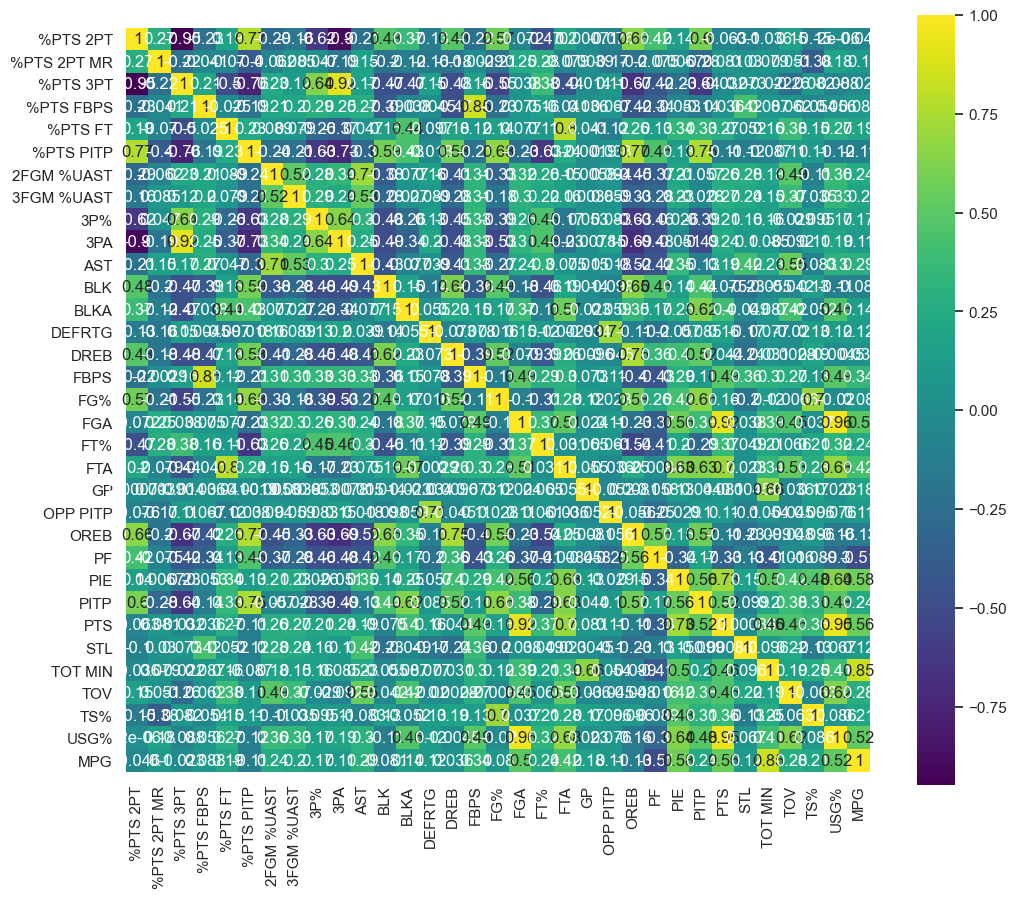

In [52]:
corr_matrix = df5.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, square=True, cmap='viridis', annot=True)

In [15]:
## write out 
df5.to_csv('../data/data5_clean.csv')

## Use old transform lists/methods to transform smaller df5 accordingly

### handle 3pt shooting outliers

In [16]:
## continue transforms with clipping 3pt shooting outliers

## Transforming non 3-pt shooter outliers
df_non_3 = pd.read_csv('../data/data5_clean.csv', index_col=0)
cols3 = ['3PA', '3P%', '3FGM %UAST']
# these are the cols I want to transform: df_non_3.loc[(df_non_3['3PA'] < 1) & ((df_non_3['3P%'] > 35) | (df_non_3['3FGM %UAST'] > 35))]

# get means to impute with
vals = [i/10 for i in range(10)]
means_3percent = [0]
means_unassisted = [0]

for n in vals[1:]:
    shooting_percent_mean = df_non_3[(df_non_3['3PA'] >= (n - 0.1)) & (df_non_3['3PA'] <= (n + 0.1))]['3P%'].mean()
    means_3percent.append(shooting_percent_mean)
    unassisted_mean = df_non_3[(df_non_3['3PA'] >= (n - 0.1)) & (df_non_3['3PA'] <= (n + 0.1))]['3FGM %UAST'].mean()
    means_unassisted.append(unassisted_mean)

## mapping dicts
percent_dict = dict(zip(vals, means_3percent))
unassisted_dict = dict(zip(vals, means_unassisted))


# make transform
df_non_3.loc[(df_non_3['3PA'] < 1) & (df_non_3['3P%'] > 35), ['3P%']] = df_non_3.loc[(df_non_3['3PA'] < 1) & (df_non_3['3P%'] > 35)]['3PA'].map(percent_dict)
df_non_3.loc[(df_non_3['3PA'] < 1) & (df_non_3['3FGM %UAST'] > 35), ['3FGM %UAST']] = df_non_3.loc[(df_non_3['3PA'] < 1) & (df_non_3['3FGM %UAST'] > 35)]['3PA'].map(unassisted_dict)

In [17]:
# check no nulls
df_non_3.isna().sum().sort_values(ascending=False)[0:5]

MPG          0
FBPS         0
%PTS 3PT     0
%PTS FBPS    0
%PTS FT      0
dtype: int64

In [18]:
## Do transforms of clipping THEN log
df_tr5 = df_non_3.copy()

In [19]:
df_tr5.loc[(df_tr5['3PA'] < 1) & ((df_tr5['3P%'] > 35) | (df_tr5['3FGM %UAST'] > 35))]
## checks out

,%PTS 2PT MR,%PTS 3PT,%PTS FBPS,%PTS FT,%PTS PITP,2FGM %UAST,3FGM %UAST,3P%,3PA,AST,...,PF,PIE,PITP,PTS,STL,TOT MIN,TOV,TS%,USG%,MPG


### Log cols (set intersection with old log cols and d4 cols)

In [20]:
## old cols taken from prev notebook

og_log_cols = ['%3PA',
            '%3PM',
            '%AST',
            '%BLK',
            '%DREB',
            '%FGA 3PT',
            '%OREB',
            '%PF',
            '%PTS 3PT',
            '%REB',
            '%TOV',
            '3FGM %UAST',
            '3PA',
            '3PM',
            'AST',
            'AST RATIO',
            'AST%',
            'AST/TO',
            'BLK',
            'BLKA',
            'DREB',
            'DREB%',
            'FBPS',
            'FG%',
            'FGM',
            'FTA',
            'FTM',
            'OREB',
            'OREB%',
            'PF',
            'REB',
            'REB%',
            'STL',
            'TO RATIO',
            'TOV',]

len(og_log_cols)

## intersection of data5cols and old log cols
d4_log_cols = set(og_log_cols).intersection(set(data5_cols))
len(d4_log_cols)
d4_log_cols

35

13

{'%PTS 3PT',
 '3FGM %UAST',
 '3PA',
 'AST',
 'BLK',
 'BLKA',
 'DREB',
 'FBPS',
 'FTA',
 'OREB',
 'PF',
 'STL',
 'TOV'}

In [21]:
## apply log transform
df_tr5.loc[:, d4_log_cols] = df_tr5[d4_log_cols].apply(np.log1p)
df_tr5.head()

,%PTS 2PT MR,%PTS 3PT,%PTS FBPS,%PTS FT,%PTS PITP,2FGM %UAST,3FGM %UAST,3P%,3PA,AST,...,PF,PIE,PITP,PTS,STL,TOT MIN,TOV,TS%,USG%,MPG
A.C. Green 96,28.5,0.405465,13.4,21.4,49.6,29.6,2.712299,5.0,0.336472,0.916291,...,1.410987,9.8,6.3,12.7,0.916291,2494.0,0.955511,52.3,11.8,30.048193
Aaron McKie 96,14.8,3.380995,18.9,21.2,35.6,60.6,2.580217,39.8,1.458615,1.824549,...,1.648659,9.5,5.0,14.0,1.252763,1624.0,1.360977,52.4,14.2,19.566265
Adam Keefe 96,12.8,0.000000,17.9,30.2,57.0,17.1,0.000000,0.0,0.095310,1.029619,...,1.871802,8.3,7.6,13.3,0.993252,917.0,1.252763,57.2,12.4,14.790323
Allan Houston 96,26.7,3.640214,12.0,14.6,21.6,48.4,3.025291,38.5,2.128232,1.504077,...,1.704748,7.8,5.0,23.2,0.587787,2681.0,1.435085,53.1,21.8,33.098765
Allen Iverson 96,12.0,3.295837,18.5,21.4,40.6,72.6,3.788725,34.1,2.116256,2.312535,...,1.547563,10.7,11.6,28.5,1.252763,3041.0,1.856298,51.3,28.1,40.013158


### Check distributions again 

In [ ]:
%%time
## transformations to compare against
data = df_tr5.copy()

## plotting...
fig, axes = plt.subplots(nrows=len(df.columns), ncols=2, figsize=(6,100)) #265
for col, [ax_box, ax_hist] in zip(df.columns, axes):    
    sns.boxplot(data=data[col], color=color, ax=ax_box)
    ax_box.set_title(col)

    sns.histplot(data=data[col], color=color, kde=True, ax=ax_hist)
    ax_hist.set_title(col)        
        
    plt.tight_layout()

plt.savefig('d4_clean_distributions_box_hist.png', bbox_inches='tight') # useless figure

Wall time: 1min 9s


## Save distribution plots for d4

In [107]:
## adding box plot for log transform

## saving image for each stat

# plt.style.use("dark_background")
plt.style.use("default")
sns.set()

## data to compare against
df = pd.read_csv('../data/data5_clean.csv', index_col=0)
df_log = df.apply(np.log1p)
norm_data = StandardScaler().fit_transform(df)
df_norm = pd.DataFrame(norm_data, index=df.index, columns=df.columns)

## plotting...
dfs = [df, df_log, df_norm]
colors = ['b', 'c', 'm']
plots = ['original', 'log transformed', 'normalized']

img_dir = '../plots/data5/each_stat_distribution/'

for col in df.columns:
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(11, 3.75))
    for data, color, plot, [ax_box, ax_hist] in zip(dfs, colors, plots, axes.reshape(3,-1)):
        sns.boxplot(data=data[col], color=color, ax=ax_box)
        ax_box.set_title(f'{col}: {plot}', fontsize=9)
        ax_box.set_xlabel(col, fontsize=8)
        
        sns.histplot(data=data[col], color=color, kde=True, ax=ax_hist)
        ax_hist.set_xlabel(col, fontsize=8)
        ax_hist.set_title(f'{col}: {plot}', fontsize=9)        

        plt.tight_layout()
        
    
    ## format nice file names
    if ' ' in col or '/' in col:
        col = col.replace(' ', '_')
        col = col.replace('/', '_')

    plt.savefig(img_dir + f'{col}_distributions.png') #, bbox_inches='tight')#, pad_inches=0.5) #, pad_inches=3.0)
    plt.close()
    


<AxesSubplot:>

Text(0.5, 1.0, '%PTS 2PT MR: original')

Text(0.5, 0, '%PTS 2PT MR')

<AxesSubplot:xlabel='%PTS 2PT MR', ylabel='Count'>

Text(0.5, 0, '%PTS 2PT MR')

Text(0.5, 1.0, '%PTS 2PT MR: original')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS 2PT MR: log transformed')

Text(0.5, 8.499999999999995, '%PTS 2PT MR')

<AxesSubplot:xlabel='%PTS 2PT MR', ylabel='Count'>

Text(0.5, 8.499999999999995, '%PTS 2PT MR')

Text(0.5, 1.0, '%PTS 2PT MR: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS 2PT MR: normalized')

Text(0.5, 28.000000000000014, '%PTS 2PT MR')

<AxesSubplot:xlabel='%PTS 2PT MR', ylabel='Count'>

Text(0.5, 28.000000000000014, '%PTS 2PT MR')

Text(0.5, 1.0, '%PTS 2PT MR: normalized')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS 3PT: original')

Text(0.5, 0, '%PTS 3PT')

<AxesSubplot:xlabel='%PTS 3PT', ylabel='Count'>

Text(0.5, 0, '%PTS 3PT')

Text(0.5, 1.0, '%PTS 3PT: original')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS 3PT: log transformed')

Text(0.5, 8.499999999999995, '%PTS 3PT')

<AxesSubplot:xlabel='%PTS 3PT', ylabel='Count'>

Text(0.5, 8.499999999999995, '%PTS 3PT')

Text(0.5, 1.0, '%PTS 3PT: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS 3PT: normalized')

Text(0.5, 28.000000000000014, '%PTS 3PT')

<AxesSubplot:xlabel='%PTS 3PT', ylabel='Count'>

Text(0.5, 28.000000000000014, '%PTS 3PT')

Text(0.5, 1.0, '%PTS 3PT: normalized')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS FBPS: original')

Text(0.5, 0, '%PTS FBPS')

<AxesSubplot:xlabel='%PTS FBPS', ylabel='Count'>

Text(0.5, 0, '%PTS FBPS')

Text(0.5, 1.0, '%PTS FBPS: original')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS FBPS: log transformed')

Text(0.5, 8.499999999999995, '%PTS FBPS')

<AxesSubplot:xlabel='%PTS FBPS', ylabel='Count'>

Text(0.5, 8.499999999999995, '%PTS FBPS')

Text(0.5, 1.0, '%PTS FBPS: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS FBPS: normalized')

Text(0.5, 28.000000000000014, '%PTS FBPS')

<AxesSubplot:xlabel='%PTS FBPS', ylabel='Count'>

Text(0.5, 28.000000000000014, '%PTS FBPS')

Text(0.5, 1.0, '%PTS FBPS: normalized')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS FT: original')

Text(0.5, 0, '%PTS FT')

<AxesSubplot:xlabel='%PTS FT', ylabel='Count'>

Text(0.5, 0, '%PTS FT')

Text(0.5, 1.0, '%PTS FT: original')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS FT: log transformed')

Text(0.5, 8.499999999999995, '%PTS FT')

<AxesSubplot:xlabel='%PTS FT', ylabel='Count'>

Text(0.5, 8.499999999999995, '%PTS FT')

Text(0.5, 1.0, '%PTS FT: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS FT: normalized')

Text(0.5, 28.000000000000014, '%PTS FT')

<AxesSubplot:xlabel='%PTS FT', ylabel='Count'>

Text(0.5, 28.000000000000014, '%PTS FT')

Text(0.5, 1.0, '%PTS FT: normalized')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS PITP: original')

Text(0.5, 0, '%PTS PITP')

<AxesSubplot:xlabel='%PTS PITP', ylabel='Count'>

Text(0.5, 0, '%PTS PITP')

Text(0.5, 1.0, '%PTS PITP: original')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS PITP: log transformed')

Text(0.5, 8.499999999999995, '%PTS PITP')

<AxesSubplot:xlabel='%PTS PITP', ylabel='Count'>

Text(0.5, 8.499999999999995, '%PTS PITP')

Text(0.5, 1.0, '%PTS PITP: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, '%PTS PITP: normalized')

Text(0.5, 28.000000000000014, '%PTS PITP')

<AxesSubplot:xlabel='%PTS PITP', ylabel='Count'>

Text(0.5, 28.000000000000014, '%PTS PITP')

Text(0.5, 1.0, '%PTS PITP: normalized')

<AxesSubplot:>

Text(0.5, 1.0, '2FGM %UAST: original')

Text(0.5, 0, '2FGM %UAST')

<AxesSubplot:xlabel='2FGM %UAST', ylabel='Count'>

Text(0.5, 0, '2FGM %UAST')

Text(0.5, 1.0, '2FGM %UAST: original')

<AxesSubplot:>

Text(0.5, 1.0, '2FGM %UAST: log transformed')

Text(0.5, 8.499999999999995, '2FGM %UAST')

<AxesSubplot:xlabel='2FGM %UAST', ylabel='Count'>

Text(0.5, 8.499999999999995, '2FGM %UAST')

Text(0.5, 1.0, '2FGM %UAST: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, '2FGM %UAST: normalized')

Text(0.5, 28.000000000000014, '2FGM %UAST')

<AxesSubplot:xlabel='2FGM %UAST', ylabel='Count'>

Text(0.5, 28.000000000000014, '2FGM %UAST')

Text(0.5, 1.0, '2FGM %UAST: normalized')

<AxesSubplot:>

Text(0.5, 1.0, '3FGM %UAST: original')

Text(0.5, 0, '3FGM %UAST')

<AxesSubplot:xlabel='3FGM %UAST', ylabel='Count'>

Text(0.5, 0, '3FGM %UAST')

Text(0.5, 1.0, '3FGM %UAST: original')

<AxesSubplot:>

Text(0.5, 1.0, '3FGM %UAST: log transformed')

Text(0.5, 8.499999999999995, '3FGM %UAST')

<AxesSubplot:xlabel='3FGM %UAST', ylabel='Count'>

Text(0.5, 8.499999999999995, '3FGM %UAST')

Text(0.5, 1.0, '3FGM %UAST: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, '3FGM %UAST: normalized')

Text(0.5, 28.000000000000014, '3FGM %UAST')

<AxesSubplot:xlabel='3FGM %UAST', ylabel='Count'>

Text(0.5, 28.000000000000014, '3FGM %UAST')

Text(0.5, 1.0, '3FGM %UAST: normalized')

<AxesSubplot:>

Text(0.5, 1.0, '3P%: original')

Text(0.5, 0, '3P%')

<AxesSubplot:xlabel='3P%', ylabel='Count'>

Text(0.5, 0, '3P%')

Text(0.5, 1.0, '3P%: original')

<AxesSubplot:>

Text(0.5, 1.0, '3P%: log transformed')

Text(0.5, 8.499999999999995, '3P%')

<AxesSubplot:xlabel='3P%', ylabel='Count'>

Text(0.5, 8.499999999999995, '3P%')

Text(0.5, 1.0, '3P%: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, '3P%: normalized')

Text(0.5, 28.000000000000014, '3P%')

<AxesSubplot:xlabel='3P%', ylabel='Count'>

Text(0.5, 28.000000000000014, '3P%')

Text(0.5, 1.0, '3P%: normalized')

<AxesSubplot:>

Text(0.5, 1.0, '3PA: original')

Text(0.5, 0, '3PA')

<AxesSubplot:xlabel='3PA', ylabel='Count'>

Text(0.5, 0, '3PA')

Text(0.5, 1.0, '3PA: original')

<AxesSubplot:>

Text(0.5, 1.0, '3PA: log transformed')

Text(0.5, 8.499999999999995, '3PA')

<AxesSubplot:xlabel='3PA', ylabel='Count'>

Text(0.5, 8.499999999999995, '3PA')

Text(0.5, 1.0, '3PA: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, '3PA: normalized')

Text(0.5, 28.000000000000014, '3PA')

<AxesSubplot:xlabel='3PA', ylabel='Count'>

Text(0.5, 28.000000000000014, '3PA')

Text(0.5, 1.0, '3PA: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'AST: original')

Text(0.5, 0, 'AST')

<AxesSubplot:xlabel='AST', ylabel='Count'>

Text(0.5, 0, 'AST')

Text(0.5, 1.0, 'AST: original')

<AxesSubplot:>

Text(0.5, 1.0, 'AST: log transformed')

Text(0.5, 8.499999999999995, 'AST')

<AxesSubplot:xlabel='AST', ylabel='Count'>

Text(0.5, 8.499999999999995, 'AST')

Text(0.5, 1.0, 'AST: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'AST: normalized')

Text(0.5, 28.000000000000014, 'AST')

<AxesSubplot:xlabel='AST', ylabel='Count'>

Text(0.5, 28.000000000000014, 'AST')

Text(0.5, 1.0, 'AST: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'BLK: original')

Text(0.5, 0, 'BLK')

<AxesSubplot:xlabel='BLK', ylabel='Count'>

Text(0.5, 0, 'BLK')

Text(0.5, 1.0, 'BLK: original')

<AxesSubplot:>

Text(0.5, 1.0, 'BLK: log transformed')

Text(0.5, 8.499999999999995, 'BLK')

<AxesSubplot:xlabel='BLK', ylabel='Count'>

Text(0.5, 8.499999999999995, 'BLK')

Text(0.5, 1.0, 'BLK: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'BLK: normalized')

Text(0.5, 28.000000000000014, 'BLK')

<AxesSubplot:xlabel='BLK', ylabel='Count'>

Text(0.5, 28.000000000000014, 'BLK')

Text(0.5, 1.0, 'BLK: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'BLKA: original')

Text(0.5, 0, 'BLKA')

<AxesSubplot:xlabel='BLKA', ylabel='Count'>

Text(0.5, 0, 'BLKA')

Text(0.5, 1.0, 'BLKA: original')

<AxesSubplot:>

Text(0.5, 1.0, 'BLKA: log transformed')

Text(0.5, 8.499999999999995, 'BLKA')

<AxesSubplot:xlabel='BLKA', ylabel='Count'>

Text(0.5, 8.499999999999995, 'BLKA')

Text(0.5, 1.0, 'BLKA: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'BLKA: normalized')

Text(0.5, 28.000000000000014, 'BLKA')

<AxesSubplot:xlabel='BLKA', ylabel='Count'>

Text(0.5, 28.000000000000014, 'BLKA')

Text(0.5, 1.0, 'BLKA: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'DEFRTG: original')

Text(0.5, 0, 'DEFRTG')

<AxesSubplot:xlabel='DEFRTG', ylabel='Count'>

Text(0.5, 0, 'DEFRTG')

Text(0.5, 1.0, 'DEFRTG: original')

<AxesSubplot:>

Text(0.5, 1.0, 'DEFRTG: log transformed')

Text(0.5, 8.499999999999995, 'DEFRTG')

<AxesSubplot:xlabel='DEFRTG', ylabel='Count'>

Text(0.5, 8.499999999999995, 'DEFRTG')

Text(0.5, 1.0, 'DEFRTG: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'DEFRTG: normalized')

Text(0.5, 28.000000000000014, 'DEFRTG')

<AxesSubplot:xlabel='DEFRTG', ylabel='Count'>

Text(0.5, 28.000000000000014, 'DEFRTG')

Text(0.5, 1.0, 'DEFRTG: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'DREB: original')

Text(0.5, 0, 'DREB')

<AxesSubplot:xlabel='DREB', ylabel='Count'>

Text(0.5, 0, 'DREB')

Text(0.5, 1.0, 'DREB: original')

<AxesSubplot:>

Text(0.5, 1.0, 'DREB: log transformed')

Text(0.5, 8.499999999999995, 'DREB')

<AxesSubplot:xlabel='DREB', ylabel='Count'>

Text(0.5, 8.499999999999995, 'DREB')

Text(0.5, 1.0, 'DREB: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'DREB: normalized')

Text(0.5, 28.000000000000014, 'DREB')

<AxesSubplot:xlabel='DREB', ylabel='Count'>

Text(0.5, 28.000000000000014, 'DREB')

Text(0.5, 1.0, 'DREB: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'FBPS: original')

Text(0.5, 0, 'FBPS')

<AxesSubplot:xlabel='FBPS', ylabel='Count'>

Text(0.5, 0, 'FBPS')

Text(0.5, 1.0, 'FBPS: original')

<AxesSubplot:>

Text(0.5, 1.0, 'FBPS: log transformed')

Text(0.5, 8.499999999999995, 'FBPS')

<AxesSubplot:xlabel='FBPS', ylabel='Count'>

Text(0.5, 8.499999999999995, 'FBPS')

Text(0.5, 1.0, 'FBPS: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'FBPS: normalized')

Text(0.5, 28.000000000000014, 'FBPS')

<AxesSubplot:xlabel='FBPS', ylabel='Count'>

Text(0.5, 28.000000000000014, 'FBPS')

Text(0.5, 1.0, 'FBPS: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'FGA: original')

Text(0.5, 0, 'FGA')

<AxesSubplot:xlabel='FGA', ylabel='Count'>

Text(0.5, 0, 'FGA')

Text(0.5, 1.0, 'FGA: original')

<AxesSubplot:>

Text(0.5, 1.0, 'FGA: log transformed')

Text(0.5, 8.499999999999995, 'FGA')

<AxesSubplot:xlabel='FGA', ylabel='Count'>

Text(0.5, 8.499999999999995, 'FGA')

Text(0.5, 1.0, 'FGA: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'FGA: normalized')

Text(0.5, 28.000000000000014, 'FGA')

<AxesSubplot:xlabel='FGA', ylabel='Count'>

Text(0.5, 28.000000000000014, 'FGA')

Text(0.5, 1.0, 'FGA: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'FT%: original')

Text(0.5, 0, 'FT%')

<AxesSubplot:xlabel='FT%', ylabel='Count'>

Text(0.5, 0, 'FT%')

Text(0.5, 1.0, 'FT%: original')

<AxesSubplot:>

Text(0.5, 1.0, 'FT%: log transformed')

Text(0.5, 8.499999999999995, 'FT%')

<AxesSubplot:xlabel='FT%', ylabel='Count'>

Text(0.5, 8.499999999999995, 'FT%')

Text(0.5, 1.0, 'FT%: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'FT%: normalized')

Text(0.5, 28.000000000000014, 'FT%')

<AxesSubplot:xlabel='FT%', ylabel='Count'>

Text(0.5, 28.000000000000014, 'FT%')

Text(0.5, 1.0, 'FT%: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'FTA: original')

Text(0.5, 0, 'FTA')

<AxesSubplot:xlabel='FTA', ylabel='Count'>

Text(0.5, 0, 'FTA')

Text(0.5, 1.0, 'FTA: original')

<AxesSubplot:>

Text(0.5, 1.0, 'FTA: log transformed')

Text(0.5, 8.499999999999995, 'FTA')

<AxesSubplot:xlabel='FTA', ylabel='Count'>

Text(0.5, 8.499999999999995, 'FTA')

Text(0.5, 1.0, 'FTA: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'FTA: normalized')

Text(0.5, 28.000000000000014, 'FTA')

<AxesSubplot:xlabel='FTA', ylabel='Count'>

Text(0.5, 28.000000000000014, 'FTA')

Text(0.5, 1.0, 'FTA: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'GP: original')

Text(0.5, 0, 'GP')

<AxesSubplot:xlabel='GP', ylabel='Count'>

Text(0.5, 0, 'GP')

Text(0.5, 1.0, 'GP: original')

<AxesSubplot:>

Text(0.5, 1.0, 'GP: log transformed')

Text(0.5, 8.499999999999995, 'GP')

<AxesSubplot:xlabel='GP', ylabel='Count'>

Text(0.5, 8.499999999999995, 'GP')

Text(0.5, 1.0, 'GP: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'GP: normalized')

Text(0.5, 28.000000000000014, 'GP')

<AxesSubplot:xlabel='GP', ylabel='Count'>

Text(0.5, 28.000000000000014, 'GP')

Text(0.5, 1.0, 'GP: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'OPP PITP: original')

Text(0.5, 0, 'OPP PITP')

<AxesSubplot:xlabel='OPP PITP', ylabel='Count'>

Text(0.5, 0, 'OPP PITP')

Text(0.5, 1.0, 'OPP PITP: original')

<AxesSubplot:>

Text(0.5, 1.0, 'OPP PITP: log transformed')

Text(0.5, 8.499999999999995, 'OPP PITP')

<AxesSubplot:xlabel='OPP PITP', ylabel='Count'>

Text(0.5, 8.499999999999995, 'OPP PITP')

Text(0.5, 1.0, 'OPP PITP: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'OPP PITP: normalized')

Text(0.5, 28.000000000000014, 'OPP PITP')

<AxesSubplot:xlabel='OPP PITP', ylabel='Count'>

Text(0.5, 28.000000000000014, 'OPP PITP')

Text(0.5, 1.0, 'OPP PITP: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'OREB: original')

Text(0.5, 0, 'OREB')

<AxesSubplot:xlabel='OREB', ylabel='Count'>

Text(0.5, 0, 'OREB')

Text(0.5, 1.0, 'OREB: original')

<AxesSubplot:>

Text(0.5, 1.0, 'OREB: log transformed')

Text(0.5, 8.499999999999995, 'OREB')

<AxesSubplot:xlabel='OREB', ylabel='Count'>

Text(0.5, 8.499999999999995, 'OREB')

Text(0.5, 1.0, 'OREB: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'OREB: normalized')

Text(0.5, 28.000000000000014, 'OREB')

<AxesSubplot:xlabel='OREB', ylabel='Count'>

Text(0.5, 28.000000000000014, 'OREB')

Text(0.5, 1.0, 'OREB: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'PF: original')

Text(0.5, 0, 'PF')

<AxesSubplot:xlabel='PF', ylabel='Count'>

Text(0.5, 0, 'PF')

Text(0.5, 1.0, 'PF: original')

<AxesSubplot:>

Text(0.5, 1.0, 'PF: log transformed')

Text(0.5, 8.499999999999995, 'PF')

<AxesSubplot:xlabel='PF', ylabel='Count'>

Text(0.5, 8.499999999999995, 'PF')

Text(0.5, 1.0, 'PF: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'PF: normalized')

Text(0.5, 28.000000000000014, 'PF')

<AxesSubplot:xlabel='PF', ylabel='Count'>

Text(0.5, 28.000000000000014, 'PF')

Text(0.5, 1.0, 'PF: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'PITP: original')

Text(0.5, 0, 'PITP')

<AxesSubplot:xlabel='PITP', ylabel='Count'>

Text(0.5, 0, 'PITP')

Text(0.5, 1.0, 'PITP: original')

<AxesSubplot:>

Text(0.5, 1.0, 'PITP: log transformed')

Text(0.5, 8.499999999999995, 'PITP')

<AxesSubplot:xlabel='PITP', ylabel='Count'>

Text(0.5, 8.499999999999995, 'PITP')

Text(0.5, 1.0, 'PITP: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'PITP: normalized')

Text(0.5, 28.000000000000014, 'PITP')

<AxesSubplot:xlabel='PITP', ylabel='Count'>

Text(0.5, 28.000000000000014, 'PITP')

Text(0.5, 1.0, 'PITP: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'PTS: original')

Text(0.5, 0, 'PTS')

<AxesSubplot:xlabel='PTS', ylabel='Count'>

Text(0.5, 0, 'PTS')

Text(0.5, 1.0, 'PTS: original')

<AxesSubplot:>

Text(0.5, 1.0, 'PTS: log transformed')

Text(0.5, 8.499999999999995, 'PTS')

<AxesSubplot:xlabel='PTS', ylabel='Count'>

Text(0.5, 8.499999999999995, 'PTS')

Text(0.5, 1.0, 'PTS: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'PTS: normalized')

Text(0.5, 28.000000000000014, 'PTS')

<AxesSubplot:xlabel='PTS', ylabel='Count'>

Text(0.5, 28.000000000000014, 'PTS')

Text(0.5, 1.0, 'PTS: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'STL: original')

Text(0.5, 0, 'STL')

<AxesSubplot:xlabel='STL', ylabel='Count'>

Text(0.5, 0, 'STL')

Text(0.5, 1.0, 'STL: original')

<AxesSubplot:>

Text(0.5, 1.0, 'STL: log transformed')

Text(0.5, 8.499999999999995, 'STL')

<AxesSubplot:xlabel='STL', ylabel='Count'>

Text(0.5, 8.499999999999995, 'STL')

Text(0.5, 1.0, 'STL: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'STL: normalized')

Text(0.5, 28.000000000000014, 'STL')

<AxesSubplot:xlabel='STL', ylabel='Count'>

Text(0.5, 28.000000000000014, 'STL')

Text(0.5, 1.0, 'STL: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'TOT MIN: original')

Text(0.5, 0, 'TOT MIN')

<AxesSubplot:xlabel='TOT MIN', ylabel='Count'>

Text(0.5, 0, 'TOT MIN')

Text(0.5, 1.0, 'TOT MIN: original')

<AxesSubplot:>

Text(0.5, 1.0, 'TOT MIN: log transformed')

Text(0.5, 8.499999999999995, 'TOT MIN')

<AxesSubplot:xlabel='TOT MIN', ylabel='Count'>

Text(0.5, 8.499999999999995, 'TOT MIN')

Text(0.5, 1.0, 'TOT MIN: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'TOT MIN: normalized')

Text(0.5, 28.000000000000014, 'TOT MIN')

<AxesSubplot:xlabel='TOT MIN', ylabel='Count'>

Text(0.5, 28.000000000000014, 'TOT MIN')

Text(0.5, 1.0, 'TOT MIN: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'TOV: original')

Text(0.5, 0, 'TOV')

<AxesSubplot:xlabel='TOV', ylabel='Count'>

Text(0.5, 0, 'TOV')

Text(0.5, 1.0, 'TOV: original')

<AxesSubplot:>

Text(0.5, 1.0, 'TOV: log transformed')

Text(0.5, 8.499999999999995, 'TOV')

<AxesSubplot:xlabel='TOV', ylabel='Count'>

Text(0.5, 8.499999999999995, 'TOV')

Text(0.5, 1.0, 'TOV: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'TOV: normalized')

Text(0.5, 28.000000000000014, 'TOV')

<AxesSubplot:xlabel='TOV', ylabel='Count'>

Text(0.5, 28.000000000000014, 'TOV')

Text(0.5, 1.0, 'TOV: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'TS%: original')

Text(0.5, 0, 'TS%')

<AxesSubplot:xlabel='TS%', ylabel='Count'>

Text(0.5, 0, 'TS%')

Text(0.5, 1.0, 'TS%: original')

<AxesSubplot:>

Text(0.5, 1.0, 'TS%: log transformed')

Text(0.5, 8.499999999999995, 'TS%')

<AxesSubplot:xlabel='TS%', ylabel='Count'>

Text(0.5, 8.499999999999995, 'TS%')

Text(0.5, 1.0, 'TS%: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'TS%: normalized')

Text(0.5, 28.000000000000014, 'TS%')

<AxesSubplot:xlabel='TS%', ylabel='Count'>

Text(0.5, 28.000000000000014, 'TS%')

Text(0.5, 1.0, 'TS%: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'USG%: original')

Text(0.5, 0, 'USG%')

<AxesSubplot:xlabel='USG%', ylabel='Count'>

Text(0.5, 0, 'USG%')

Text(0.5, 1.0, 'USG%: original')

<AxesSubplot:>

Text(0.5, 1.0, 'USG%: log transformed')

Text(0.5, 8.499999999999995, 'USG%')

<AxesSubplot:xlabel='USG%', ylabel='Count'>

Text(0.5, 8.499999999999995, 'USG%')

Text(0.5, 1.0, 'USG%: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'USG%: normalized')

Text(0.5, 28.000000000000014, 'USG%')

<AxesSubplot:xlabel='USG%', ylabel='Count'>

Text(0.5, 28.000000000000014, 'USG%')

Text(0.5, 1.0, 'USG%: normalized')

<AxesSubplot:>

Text(0.5, 1.0, 'MPG: original')

Text(0.5, 0, 'MPG')

<AxesSubplot:xlabel='MPG', ylabel='Count'>

Text(0.5, 0, 'MPG')

Text(0.5, 1.0, 'MPG: original')

<AxesSubplot:>

Text(0.5, 1.0, 'MPG: log transformed')

Text(0.5, 8.499999999999995, 'MPG')

<AxesSubplot:xlabel='MPG', ylabel='Count'>

Text(0.5, 8.499999999999995, 'MPG')

Text(0.5, 1.0, 'MPG: log transformed')

<AxesSubplot:>

Text(0.5, 1.0, 'MPG: normalized')

Text(0.5, 28.000000000000014, 'MPG')

<AxesSubplot:xlabel='MPG', ylabel='Count'>

Text(0.5, 28.000000000000014, 'MPG')

Text(0.5, 1.0, 'MPG: normalized')

### Visualize in 1 large picture

In [ ]:
%%time
## transformations to compare against
df = pd.read_csv('../data/data5_clean.csv', index_col=0)
df_log = df.apply(np.log1p)
norm_data = StandardScaler().fit_transform(df)
df_norm = pd.DataFrame(norm_data, index=df.index, columns=df.columns)

## plotting...
fig, axes = plt.subplots(nrows=len(df.columns), ncols=6, figsize=(13,100)) #265
dfs = [df, df_log, df_norm]
colors = ['b', 'c', 'm']
plots = ['original', 'log transformed', 'normalized']

for col, axe_row in zip(df.columns, axes):
    for data, [ax_box, ax_hist], color, plot in zip(dfs, axe_row.reshape(3,-1), colors, plots):
        
        sns.boxplot(data=data[col], color=color, ax=ax_box)
        ax_box.set_title(f'{col}: {plot}')
        
        sns.histplot(data=data[col], color=color, kde=True, ax=ax_hist)
        ax_hist.set_title(f'{col}: {plot}')        
        
    plt.tight_layout()

plt.savefig('d4_stat_distributions_box_hist.png', bbox_inches='tight') # useless figure

## Normalize (after clipping and logging before plots) and save

In [22]:
zscores = StandardScaler().fit_transform(df_tr5)
df_tr5 = pd.DataFrame(zscores, index=df_tr5.index, columns=df_tr5.columns)
df_tr5.describe()

,%PTS 2PT MR,%PTS 3PT,%PTS FBPS,%PTS FT,%PTS PITP,2FGM %UAST,3FGM %UAST,3P%,3PA,AST,...,PF,PIE,PITP,PTS,STL,TOT MIN,TOV,TS%,USG%,MPG
count,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,...,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03
mean,1.255168e-16,2.039648e-16,5.491360e-17,-4.706880e-17,5.157956e-16,3.137920e-17,3.137920e-17,9.413760e-17,7.844800e-17,1.117884e-16,...,2.981024e-16,5.883600e-18,-2.353440e-17,8.629280e-17,-1.882752e-16,3.922400e-17,-9.256864e-16,-7.844800e-16,-3.971430e-17,-3.373264e-16
std,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,...,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00
min,-1.608683e+00,-1.556645e+00,-1.995727e+00,-2.667545e+00,-2.355633e+00,-2.336150e+00,-1.160535e+00,-1.743168e+00,-1.497250e+00,-2.818753e+00,...,-3.108480e+00,-3.178621e+00,-2.073899e+00,-2.791909e+00,-3.664704e+00,-1.965586e+00,-4.011214e+00,-4.076521e+00,-3.006813e+00,-2.212177e+00
25%,-7.575399e-01,-1.131001e+00,-7.604690e-01,-7.246199e-01,-7.543130e-01,-7.466529e-01,-1.160535e+00,-6.222836e-01,-1.192865e+00,-7.002932e-01,...,-6.898985e-01,-6.694557e-01,-7.410855e-01,-6.997563e-01,-6.096832e-01,-8.361879e-01,-6.539580e-01,-6.556497e-01,-7.209085e-01,-8.232036e-01
50%,-1.170755e-01,4.382039e-01,-8.811369e-02,-5.574405e-02,-1.294076e-01,-1.942746e-01,1.341984e-01,4.247697e-01,3.699599e-01,-1.301208e-01,...,-6.033190e-02,-7.517981e-02,-1.240422e-01,-9.954866e-02,-4.626233e-02,-7.546656e-02,4.394976e-02,-1.020222e-02,-8.250282e-02,-2.359105e-02
75%,5.992334e-01,8.270851e-01,6.780587e-01,6.290574e-01,6.852013e-01,6.962946e-01,8.607928e-01,7.268042e-01,8.557321e-01,7.393587e-01,...,6.652754e-01,5.521114e-01,6.164098e-01,6.035518e-01,6.078934e-01,7.583226e-01,7.305922e-01,6.352453e-01,6.382778e-01,8.164200e-01
max,5.023494e+00,1.420729e+00,4.727827e+00,5.008602e+00,3.151346e+00,2.736713e+00,2.174371e+00,1.867824e+00,1.894093e+00,2.689791e+00,...,3.838411e+00,4.679028e+00,5.330621e+00,4.805006e+00,3.347961e+00,2.577229e+00,3.313431e+00,4.142177e+00,4.365743e+00,2.401990e+00


In [23]:
df_tr5.to_csv('../data/data5_tr.csv')

In [24]:
df_tr5.isna().sum().sort_values(ascending=False)[0:5]

MPG          0
FBPS         0
%PTS 3PT     0
%PTS FBPS    0
%PTS FT      0
dtype: int64

## PCA

In [25]:
df = pd.read_csv('../data/data5_tr.csv', index_col=0)
pca = PCA(n_components=0.99)
pca.fit(df)
pca.n_components_
df_pca = pd.DataFrame(pca.transform(df), index=df.index, columns=[f'pc_{n}' for n in range(pca.n_components_)])
df_pca.head()
df_pca.to_csv('../data/pca5_99.csv')

PCA(n_components=0.99)

21

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18,pc_19,pc_20
A.C. Green 96,2.287779,-0.759765,-0.834037,1.050590,-1.718330,-1.916075,1.252969,1.065771,0.979718,0.915659,...,0.675848,1.228399,0.458374,-0.416791,1.676291,-0.990458,-0.584492,0.823748,-0.724647,0.481390
Aaron McKie 96,-1.192152,-1.511924,2.000425,1.073580,-2.243787,0.901805,-0.960046,0.580025,-0.898222,-0.054286,...,1.012674,0.607203,-0.687582,0.644480,0.332182,-0.003901,0.794640,-0.175964,-0.284277,0.399521
Adam Keefe 96,4.181718,-1.008846,1.456615,0.120232,-1.836368,1.865487,0.317185,1.764423,1.400195,-0.198825,...,-0.231987,0.440559,0.069942,-0.929534,0.260261,0.291254,-0.309070,0.791160,-0.309387,0.324932
Allan Houston 96,-2.736333,-0.400689,-0.163893,2.395374,0.431180,0.222615,0.213837,0.315904,-1.951599,0.143267,...,-1.030565,-0.808761,-0.123703,-0.007744,0.378603,-0.247842,-0.416368,0.373467,0.063328,0.108679
Allen Iverson 96,-4.281216,4.102108,0.498579,-2.292836,-0.651280,-2.075754,0.592680,0.082731,-1.040444,0.630842,...,-0.555578,-0.893531,0.460126,-0.333656,-0.471491,-0.389636,-0.269894,0.067716,0.066357,0.083951


In [26]:
df_pca['pc_0'].sort_values(ascending=False)[0:15]
df_pca['pc_0'].sort_values(ascending=True)[0:15]

## interesting split based on pc0

Joel Przybilla 06     8.023163
Andris Biedrins 11    8.021766
Andris Biedrins 05    7.677526
Bismack Biyombo 13    7.513145
DeSagana Diop 06      7.293484
Chris Dudley 97       7.275463
Jamaal Magloire 08    7.259657
Joel Przybilla 09     7.258204
Joel Przybilla 01     7.255337
Greg Ostertag 05      7.231089
Hasheem Thabeet 12    7.163543
Andris Biedrins 09    7.111360
Adonal Foyle 07       7.108280
Andrew Bogut 16       7.090917
Chuck Hayes 08        7.083441
Name: pc_0, dtype: float64

Stephen Curry 15       -6.114147
Stephen Curry 13       -6.019039
Stephen Curry 14       -6.014216
Stephen Curry 12       -5.835357
Russell Westbrook 16   -5.699546
Allen Iverson 04       -5.675673
Trae Young 19          -5.667161
Stephen Curry 16       -5.644541
James Harden 18        -5.628616
Steve Nash 07          -5.610776
Jason Williams 01      -5.548691
Jason Williams 02      -5.541454
Darrell Armstrong 99   -5.486647
Damian Lillard 19      -5.449913
Isaiah Thomas 16       -5.412290
Name: pc_0, dtype: float64

In [39]:
# ## Just proofing some stuff...

# c1 = pd.read_csv('../data/data2_clean.csv', index_col=0)
# c2 = pd.read_csv('../data/data_clean2.csv', index_col=0)

In [42]:
# c1.head()
# c2.head()

,GP,%BLKA,TO RATIO,PITP,%STL,DREB%,DREB,%PFD,%3PA,FBPS,...,DEFRTG,AST,%OREB,%PF,REB%,FG%,%PTS 3PT,%FTA,FGM %UAST,MPG
A.C. Green 96,83,15.5,10.3,6.3,18.1,18.4,9.2,0.4,2.6,1.7,...,104.8,1.5,33.9,14.8,13.5,48.3,0.5,17.6,29.9,30.048193
Aaron McKie 96,83,22.6,13.5,5.0,30.1,11.3,5.9,0.0,16.6,2.7,...,97.8,5.2,10.2,17.3,7.1,41.1,28.4,12.6,47.3,19.566265
Adam Keefe 96,62,16.5,15.9,7.6,18.5,15.8,8.0,0.2,0.5,2.4,...,99.4,1.8,35.5,20.2,12.9,51.3,0.0,19.2,17.1,14.790323
Allan Houston 96,81,19.6,11.4,5.0,10.1,7.5,3.8,0.1,44.7,2.8,...,99.4,3.5,6.8,17.6,4.8,42.3,37.1,16.6,38.7,33.098765
Allen Iverson 96,76,26.5,12.7,11.6,29.0,6.4,3.1,0.0,42.8,5.3,...,111.4,9.1,11.3,17.2,4.9,41.6,26.0,28.0,65.3,40.013158


,FTM,AST,3PM,%STL,OREB,AST%,DREB%,%PTS 3PT,%PTS FT,BLKA,...,%BLKA,PIE,%PTS FBPS,%FGA 3PT,FGM %UAST,OREB%,PTS,%BLK,%PTS PITP,MPG
A.C. Green 96,2.7,1.5,0.0,18.1,4.7,4.5,18.4,0.5,21.4,0.9,...,15.5,9.8,13.4,4.1,29.9,8.9,12.7,8.4,49.6,30.048193
Aaron McKie 96,3.0,5.2,1.3,30.1,1.3,16.3,11.3,28.4,21.2,1.2,...,22.6,9.5,18.9,28.2,47.3,2.6,14.0,12.4,35.6,19.566265
Adam Keefe 96,4.0,1.8,0.0,18.5,4.2,5.1,15.8,0.0,30.2,0.7,...,16.5,8.3,17.9,0.6,17.1,9.6,13.3,16.9,57.0,14.790323
Allan Houston 96,3.4,3.5,2.9,10.1,0.8,11.7,7.5,37.1,14.6,0.7,...,19.6,7.8,12.0,37.2,38.7,1.8,23.2,6.7,21.6,33.098765
Allen Iverson 96,6.1,9.1,2.5,29.0,1.8,32.0,6.4,26.0,21.4,1.7,...,26.5,10.7,18.5,30.3,65.3,3.5,28.5,7.6,40.6,40.013158
